<a href="https://colab.research.google.com/github/Apolo073/CODER_Cienciadedatos/blob/main/Comportamiento_Compra%2BStein_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SCIENCE CODERHOUSE [#61750]

ALUMNO: STEIN NAHUEL

## INTRODUCCIÓN

En el ámbito del análisis de datos y la predicción de costos en campañas de marketing, es crucial entender los patrones de consumo y las preferencias de los clientes. Este trabajo práctico se enfoca en analizar un conjunto de datos de una cadena de supermercados en EE. UU., México y Canadá, con el objetivo de validar varias hipótesis relacionadas con el comportamiento de compra de los clientes. Se busca obtener insights valiosos que puedan guiar estrategias de marketing más efectivas y personalizadas.

## DESCRIPCIÓN DEL PROBLEMA

El objetivo principal de este análisis es descubrir y confirmar patrones específicos en el comportamiento de compra de los clientes, que puedan impactar tanto en el costo como en la efectividad de las campañas de marketing. Es esencial entender cómo las distintas variables influyen en las decisiones de compra y los costos asociados a las campañas, para poder así diseñar estrategias de marketing más efectivas.

## FUENTE

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/yasserh/loan-default-dataset


## **DESARROLLO**:

###1) DATA ACQUISITION

Datos detallados sobre las ventas de varios productos alimenticios, centrándose en alimentos congelados, desayunos, productos horneados y vegetales, en supermercados de EE. UU., México y Canadá.

a) Datos de Ventas y Costos:

Se proporcionan los costos de la tienda y las ventas unitarias correspondientes.

b) Promociones:

Incluye promociones como "Bag Stuffers", "Cash Register Lottery", "High Roller Savings", "Double Down Sale", "Price Savers" y "Super Duper Savers".

c) Demografía de Clientes:

Información sobre estado civil, género, número de hijos, niveles educativos, estado de la tarjeta de miembro, ocupaciones, propiedad de vivienda, promedio de autos en casa, ingreso anual promedio y número de hijos en casa.

d) Detalles del Producto:

Marcas y detalles específicos como peso bruto, peso neto, estado del paquete reciclable, estado bajo en grasa y unidades por caja.
Características de las Tiendas:

e) Tipos de tiendas:

Ciudades y estados de las tiendas, metraje cuadrado de la tienda, metraje cuadrado de comestibles, metraje cuadrado de congelados, metraje cuadrado de carnes. Presencia de barra de café, tienda de videos, barra de ensaladas, comida preparada, floristería.

f) Tipos de medios utilizados para promociones

g) Ubicaciones Geográficas:

Incluye ciudades en México, Canadá y EE. UU.

h) Canales de Publicidad:

Diversos canales como Daily Paper, Radio, TV, In-Store Coupon, Street Handout, Product Attachment, Cash Register Handout, Bulk Mail.

i) Cifras de Ventas:

Datos detallados de ventas para cada producto y ubicación, incluyendo precios, cantidades y efectividad de las promociones.

#### IMPORTACIÓN DE LIBRERIAS

In [28]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#### CARGA BASE DE DATOS

In [29]:
url = "https://raw.githubusercontent.com/Apolo073/DataScience-Entrega1/refs/heads/main/media%20prediction%20and%20its%20cost.csv"
df = pd.read_csv(url)


VALIDACION ESTRUCTURA DE DATASET

####Dimensiones del Dataset

In [30]:
df.shape

(60428, 40)

El conjunto de datos contiene un total de 60428 (registros) y 40 columnas (variables).


#### Primeros registros del archivo:

In [31]:
df.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


####Listado de columnas:

In [32]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

#### Validación de columnas, cantidad de datos nulos y tipo de formato

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604


No se observan columnas con valores faltantes (non-null count igual que el número total de filas).

#### Descripción de variable numericas

In [34]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


###2) ANÁLISIS EXPLORATORIO - EDA

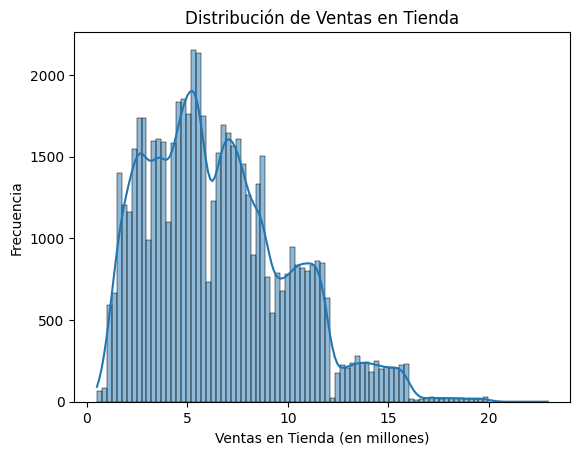

In [35]:
# Distribución de ventas en tienda
sb.histplot(df['store_sales(in millions)'], kde=True)
plt.title('Distribución de Ventas en Tienda')
plt.xlabel('Ventas en Tienda (en millones)')
plt.ylabel('Frecuencia')
plt.show()

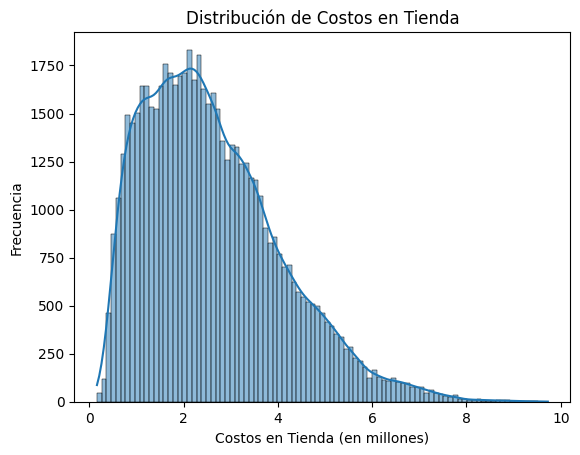

In [36]:
# Distribución de costos en tienda
sb.histplot(df['store_cost(in millions)'], kde=True)
plt.title('Distribución de Costos en Tienda')
plt.xlabel('Costos en Tienda (en millones)')
plt.ylabel('Frecuencia')
plt.show()

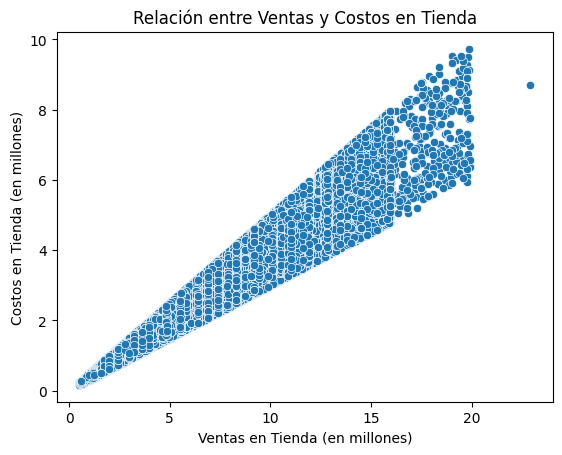

In [37]:
# Relación entre ventas y costos
sb.scatterplot(x='store_sales(in millions)', y='store_cost(in millions)', data=df)
plt.title('Relación entre Ventas y Costos en Tienda')
plt.xlabel('Ventas en Tienda (en millones)')
plt.ylabel('Costos en Tienda (en millones)')
plt.show()

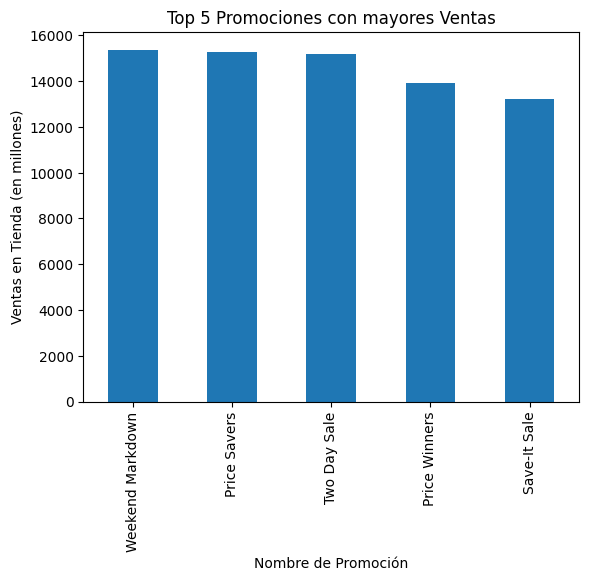

In [38]:
# Calcular el total de ventas por nombre de promoción
promotion_sales = df.groupby('promotion_name')['store_sales(in millions)'].sum()

# Obtener los 5 nombres de promoción con más ventas
top_5_promotions = promotion_sales.nlargest(5)

# Crear gráfico de barras
fig, ax = plt.subplots()
top_5_promotions.plot(kind='bar', ax=ax)

# Título y etiquetas del gráfico
ax.set_title('Top 5 Promociones con mayores Ventas')
ax.set_xlabel('Nombre de Promoción')
ax.set_ylabel('Ventas en Tienda (en millones)')

# Mostrar gráfico
plt.show()

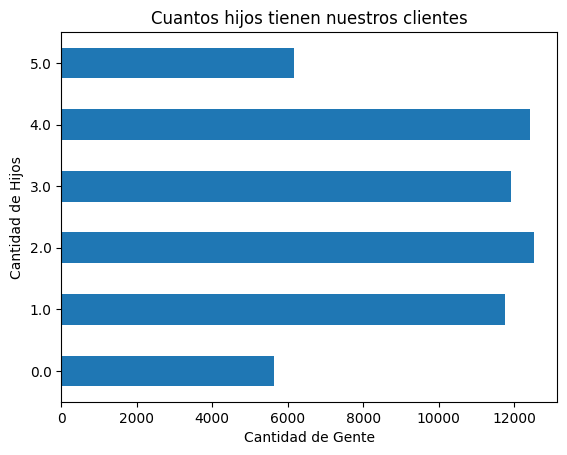

In [39]:
# Contar la cantidad de gente por cantidad de hijos
children_counts = df['total_children'].value_counts().sort_index()

# Crear gráfico de barras horizontales
fig, ax = plt.subplots()
children_counts.plot(kind='barh', ax=ax)

# Título y etiquetas del gráfico
ax.set_title('Cuantos hijos tienen nuestros clientes')
ax.set_xlabel('Cantidad de Gente')
ax.set_ylabel('Cantidad de Hijos')

# Mostrar gráfico
plt.show()

###3) ANÁLSIS ESTADÍSTICO DE DATOS (Univariados, Bivariados y Multivariados)

#### ANALISIS UNIVARIADO

In [40]:
# Análisis univariado de 'store_sales (in millions)'
print("Estadísticas descriptivas de 'store_sales (in millions)':")
print(df['store_sales(in millions)'].describe())

Estadísticas descriptivas de 'store_sales (in millions)':
count    60428.000000
mean         6.541031
std          3.463047
min          0.510000
25%          3.810000
50%          5.940000
75%          8.670000
max         22.920000
Name: store_sales(in millions), dtype: float64


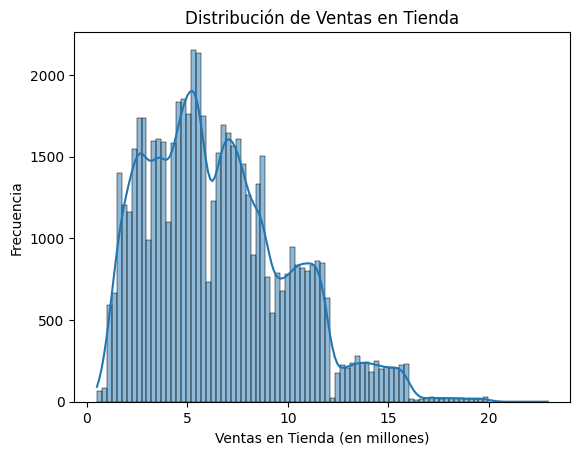

In [41]:
# Histograma de 'store_sales (in millions)'
sb.histplot(df['store_sales(in millions)'], kde=True)
plt.title('Distribución de Ventas en Tienda')
plt.xlabel('Ventas en Tienda (en millones)')
plt.ylabel('Frecuencia')
plt.show()

In [42]:
# Análisis univariado de 'cost'
print("Estadísticas descriptivas de 'cost':")
print(df['cost'].describe())

Estadísticas descriptivas de 'cost':
count    60428.000000
mean        99.262366
std         30.011257
min         50.790000
25%         69.650000
50%         98.520000
75%        126.620000
max        149.750000
Name: cost, dtype: float64


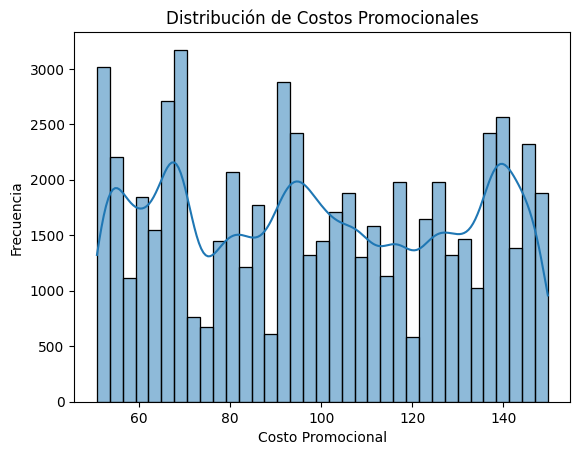

In [43]:
# Histograma de 'cost'
sb.histplot(df['cost'], kde=True)
plt.title('Distribución de Costos Promocionales')
plt.xlabel('Costo Promocional')
plt.ylabel('Frecuencia')
plt.show()

#### ANALISIS BIVARIADO

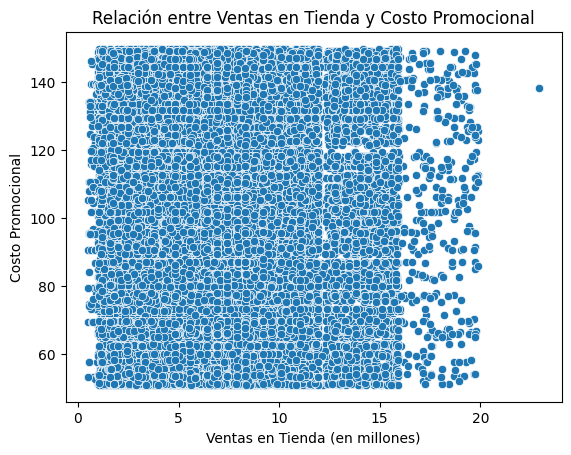

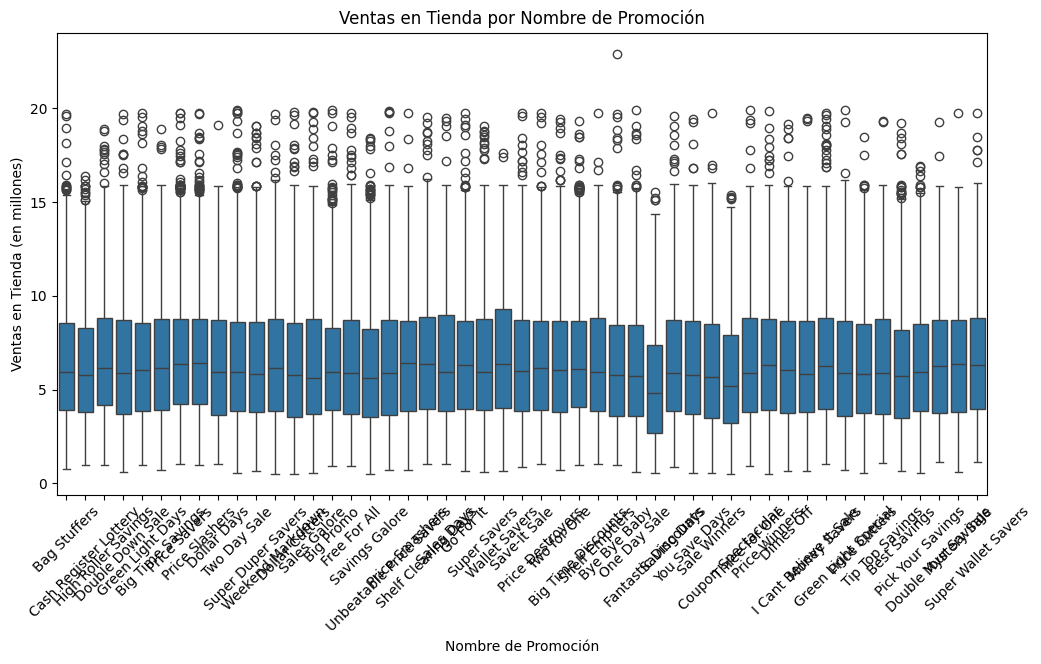

In [44]:
# Relación entre 'store_sales (in millions)' y 'cost'
sb.scatterplot(x='store_sales(in millions)', y='cost', data=df)
plt.title('Relación entre Ventas en Tienda y Costo Promocional')
plt.xlabel('Ventas en Tienda (en millones)')
plt.ylabel('Costo Promocional')
plt.show()

# Boxplot de 'store_sales (in millions)' por 'promotion_name'
plt.figure(figsize=(12, 6))
sb.boxplot(x='promotion_name', y='store_sales(in millions)', data=df)
plt.title('Ventas en Tienda por Nombre de Promoción')
plt.xlabel('Nombre de Promoción')
plt.ylabel('Ventas en Tienda (en millones)')
plt.xticks(rotation=45)
plt.show()

#### ANALISIS MULTIVARIADO

AGREGAR VISUALIZACION ENTRE LAS VARIABLES Q ESTOY CORRELACIONANDO

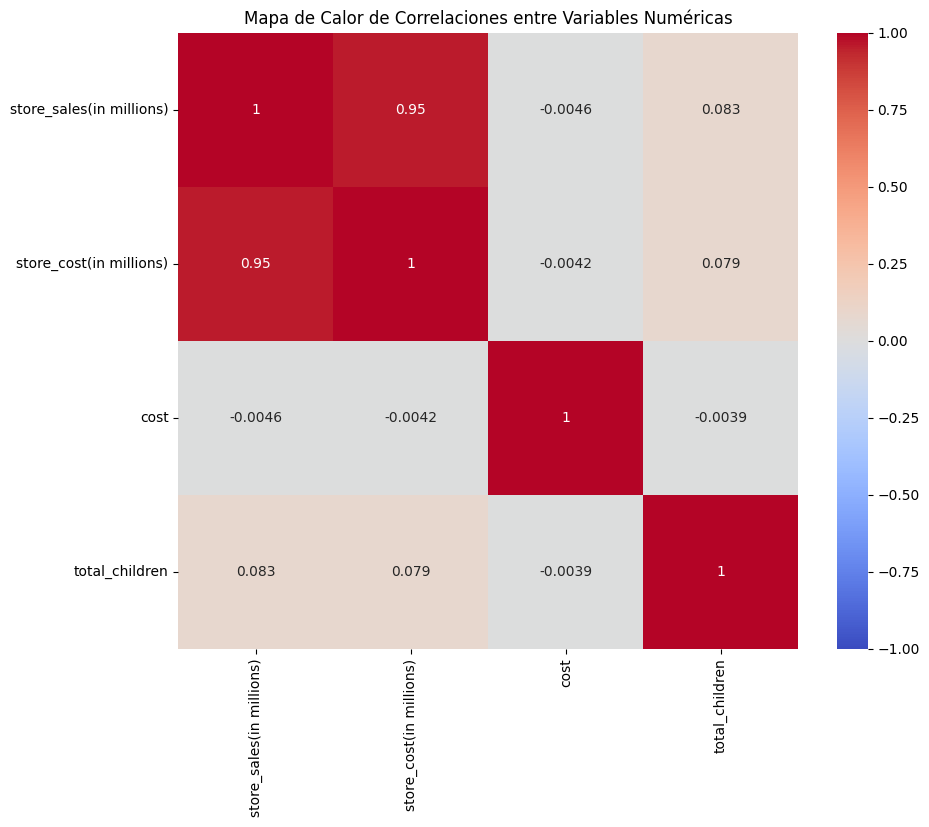

In [ ]:
# Heatmap de correlaciones entre variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[['store_sales(in millions)', 'store_cost(in millions)', 'cost', 'total_children']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

###4) PREPROCESAMIENTO DE VARIABLES

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

In [46]:
url = "https://raw.githubusercontent.com/Apolo073/DataScience-Entrega1/refs/heads/main/media%20prediction%20and%20its%20cost.csv"
df = pd.read_csv(url)

Se crea un diccionario income_mapping para mapear los rangos de ingresos a valores numéricos.

Se aplica este mapeo a la columna avg. yearly_income.

In [47]:
# Asignar valores numéricos a los rangos de ingresos
income_mapping = {
    '$10K - $30K': 20000,
    '$30K - $50K': 40000,
    '$50K - $70K': 60000,
    '$70K - $90K': 80000,
    '$90K - $110K': 100000,
    '$110K - $130K': 120000,
    '$130K - $150K': 140000,
    '$150K +': 150000
}
df['avg. yearly_income'] = df['avg. yearly_income'].map(income_mapping)

Se utiliza pd.get_dummies para transformar las variables categóricas en variables numéricas mediante la técnica de codificación one-hot.

In [48]:
# Encoding de variables categóricas
df_encoded = pd.get_dummies(df, columns=[
    'food_category', 'food_department', 'food_family', 'promotion_name',
    'sales_country', 'marital_status', 'gender', 'education', 'member_card',
    'occupation', 'houseowner', 'brand_name', 'store_type', 'store_city',
    'store_state', 'media_type'
])
df_encoded

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,7.36,2.7232,4.0,1.0,1.0,20000,1.0,1.0,1.84,19.70,...,True,False,False,False,False,False,False,False,False,False
1,5.52,2.5944,3.0,0.0,4.0,60000,0.0,4.0,1.84,19.70,...,True,False,False,False,False,False,False,False,False,False
2,3.68,1.3616,2.0,4.0,1.0,20000,0.0,1.0,1.84,19.70,...,True,False,False,False,False,False,False,False,False,False
3,3.68,1.1776,2.0,2.0,2.0,40000,2.0,2.0,1.84,19.70,...,False,False,True,False,False,False,False,False,False,False
4,4.08,1.4280,3.0,0.0,2.0,40000,0.0,2.0,1.36,7.12,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,1.0,20000,1.0,1.0,2.76,19.60,...,False,False,True,False,False,False,False,False,False,False
60424,1.60,0.4960,1.0,2.0,2.0,40000,0.0,2.0,1.60,17.40,...,False,False,False,False,False,False,True,False,False,False
60425,5.52,2.5392,2.0,1.0,3.0,40000,0.0,3.0,2.76,19.60,...,False,False,False,False,False,False,False,False,True,False
60426,8.28,2.5668,3.0,2.0,4.0,80000,0.0,4.0,2.76,19.60,...,False,False,False,False,False,False,True,False,False,False


Se crea una nueva variable high_income que toma el valor 1 si el ingreso anual promedio es mayor o igual a $50K, y 0 en caso contrario.

In [49]:
# Crear nuevas variables
#df_encoded['high_income'] = df_encoded['avg. yearly_income'].apply(lambda x: 1 if x >= 50000 else 0)
df_encoded.columns

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'SRP', 'gross_weight',
       ...
       'media_type_Daily Paper, Radio', 'media_type_Daily Paper, Radio, TV',
       'media_type_In-Store Coupon', 'media_type_Product Attachment',
       'media_type_Radio', 'media_type_Street Handout',
       'media_type_Sunday Paper', 'media_type_Sunday Paper, Radio',
       'media_type_Sunday Paper, Radio, TV', 'media_type_TV'],
      dtype='object', length=324)

Se utiliza SimpleImputer para imputar los valores faltantes con la media de cada columna.

Se convierte el array de NumPy de vuelta a un DataFrame de pandas.

In [50]:
# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
df_encoded_imputed = imputer.fit_transform(df_encoded)

# Convertir el array de NumPy de vuelta a un DataFrame de pandas
df_encoded_imputed = pd.DataFrame(df_encoded_imputed, columns=df_encoded.columns)

### 5) SELECION DE MODELOS Y ENTRENAMIENTO

Se separan las variables predictoras (X) de la variable objetivo (y).

In [51]:
# Separar variables predictoras y objetivo
X = df_encoded_imputed.drop(['store_sales(in millions)', 'avg. yearly_income'], axis=1)
y = df_encoded_imputed['store_sales(in millions)']

Se dividen los datos en conjuntos de entrenamiento y prueba utilizando train_test_split.

In [52]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se entrenan dos modelos: Regresión Lineal (LinearRegression) y Random Forest Regressor (RandomForestRegressor).

In [54]:
# Entrenar modelos
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)

####6) VALIDACIÓN

Se obtienen las importancias de las características del modelo de Random Forest y se visualizan las 10 características más importantes.

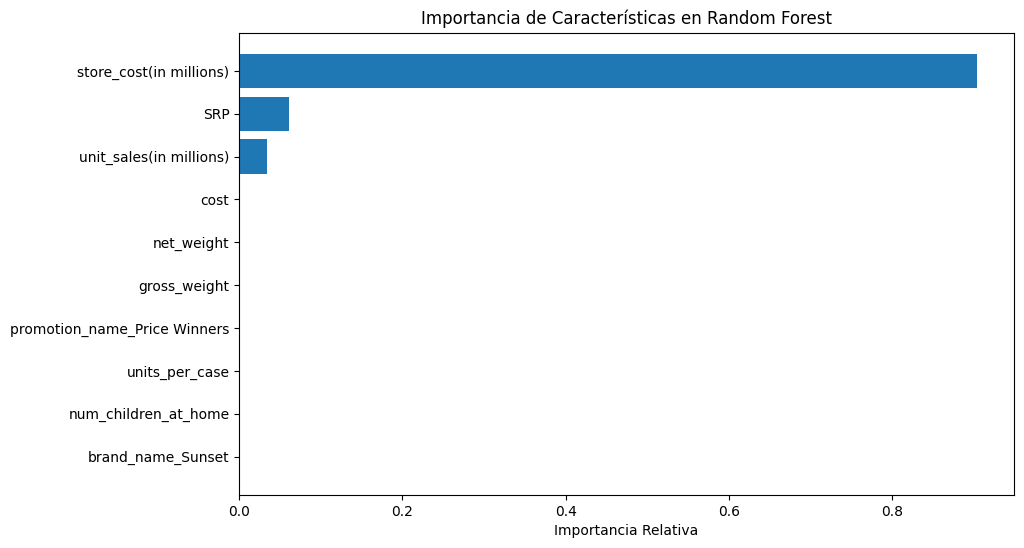

In [55]:
# Evaluación de la importancia de características en Random Forest
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[-10:]  # Obtener las 10 características más importantes

plt.figure(figsize=(10, 6))
plt.title('Importancia de Características en Random Forest')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

Se obtienen los coeficientes del modelo de regresión lineal y se visualizan los 10 coeficientes más importantes.

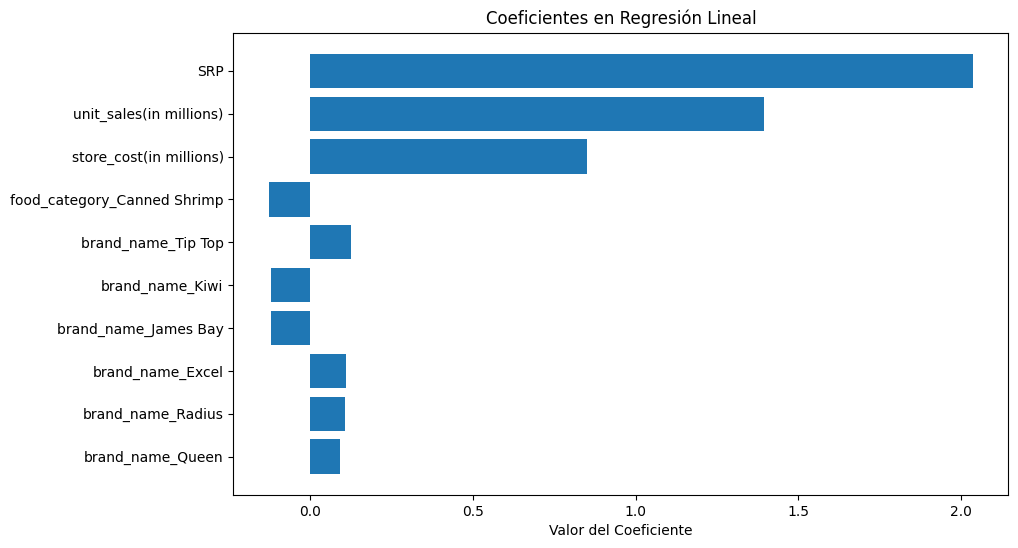

In [56]:
# Evaluación de los coeficientes en Regresión Lineal
coefficients = lr.coef_
indices = np.argsort(np.abs(coefficients))[-10:]  # Obtener los 10 coeficientes más importantes

plt.figure(figsize=(10, 6))
plt.title('Coeficientes en Regresión Lineal')
plt.barh(range(len(indices)), coefficients[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Valor del Coeficiente')
plt.show()

Se muestran los coeficientes de determinación (R^2) de los modelos entrenados para evaluar su desempeño.

In [57]:
# Mostrar los resultados de los modelos entrenados
print(f"Linear Regression R^2: {lr.score(X_test, y_test)}")
print(f"Random Forest Regressor R^2: {rf.score(X_test, y_test)}")

Linear Regression R^2: 0.9672915577375479
Random Forest Regressor R^2: 0.9997536433855359


#### **Resultados de los Modelos**

Regresión Lineal:

R^2: 0.967. Esto significa que el modelo de regresión lineal explica aproximadamente el 96.7% de la variabilidad en las ventas en tienda. Es un resultado muy sólido, indicando que el modelo se ajusta bien a los datos.

Random Forest Regressor:

R^2: 0.999. Esto significa que el modelo de Random Forest explica aproximadamente el 99.9% de la variabilidad en las ventas en tienda. Es un resultado excelente, indicando que el modelo tiene un ajuste casi perfecto a los datos.

### 7) Hipótesis y Evaluación

**Hipótesis 1:** La promoción utilizada influye significativamente en las ventas en tienda.
Columnas relevantes: promotion_name, store_sales(in millions)
Evaluación: Analizar la relación entre el tipo de promoción (promotion_name) y las ventas en tienda (store_sales(in millions)).

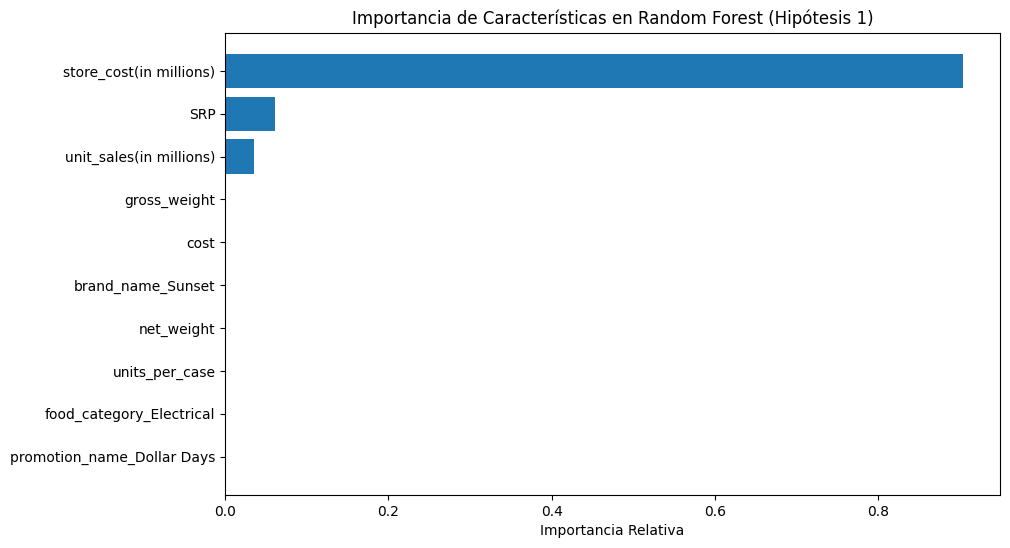

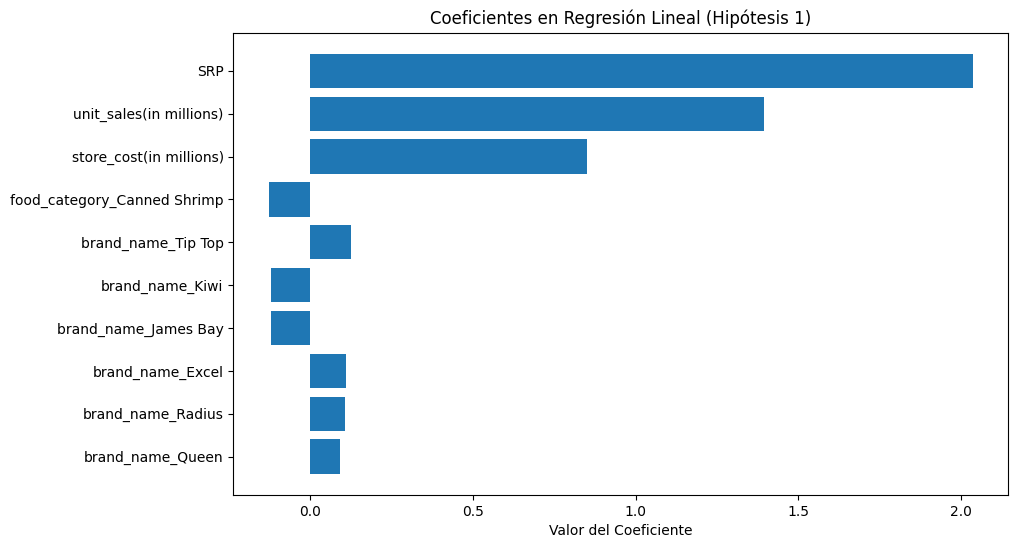

Linear Regression R^2 (Hipótesis 1): 0.9672915577375479
Random Forest Regressor R^2 (Hipótesis 1): 0.9997526977443454


In [59]:
# Hipótesis 1: La promoción utilizada influye significativamente en las ventas en tienda
X1 = df_encoded_imputed.drop(['store_sales(in millions)', 'avg. yearly_income'], axis=1)
y1 = df_encoded_imputed['store_sales(in millions)']
# Dividir en conjuntos de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Entrenar modelos
lr1 = LinearRegression().fit(X1_train, y1_train)
rf1 = RandomForestRegressor().fit(X1_train, y1_train)

# Evaluación de la importancia de características en Random Forest
feature_importances1 = rf1.feature_importances_
features1 = X1.columns
indices1 = np.argsort(feature_importances1)[-10:]  # Obtener las 10 características más importantes

plt.figure(figsize=(10, 6))
plt.title('Importancia de Características en Random Forest (Hipótesis 1)')
plt.barh(range(len(indices1)), feature_importances1[indices1], align='center')
plt.yticks(range(len(indices1)), [features1[i] for i in indices1])
plt.xlabel('Importancia Relativa')
plt.show()

# Evaluación de los coeficientes en Regresión Lineal
coefficients1 = lr1.coef_
indices1 = np.argsort(np.abs(coefficients1))[-10:]  # Obtener los 10 coeficientes más importantes

plt.figure(figsize=(10, 6))
plt.title('Coeficientes en Regresión Lineal (Hipótesis 1)')
plt.barh(range(len(indices1)), coefficients1[indices1], align='center')
plt.yticks(range(len(indices1)), [features1[i] for i in indices1])
plt.xlabel('Valor del Coeficiente')
plt.show()

# Mostrar los resultados de los modelos entrenados
print(f"Linear Regression R^2 (Hipótesis 1): {lr1.score(X1_test, y1_test)}")
print(f"Random Forest Regressor R^2 (Hipótesis 1): {rf1.score(X1_test, y1_test)}")

**Hipótesis 2:** El ingreso anual promedio de los clientes está correlacionado con las ventas en tienda.
Columnas relevantes: avg. yearly_income, store_sales(in millions)
Evaluación: Analizar la relación entre el ingreso anual promedio (avg. yearly_income) y las ventas en tienda (store_sales(in millions)).

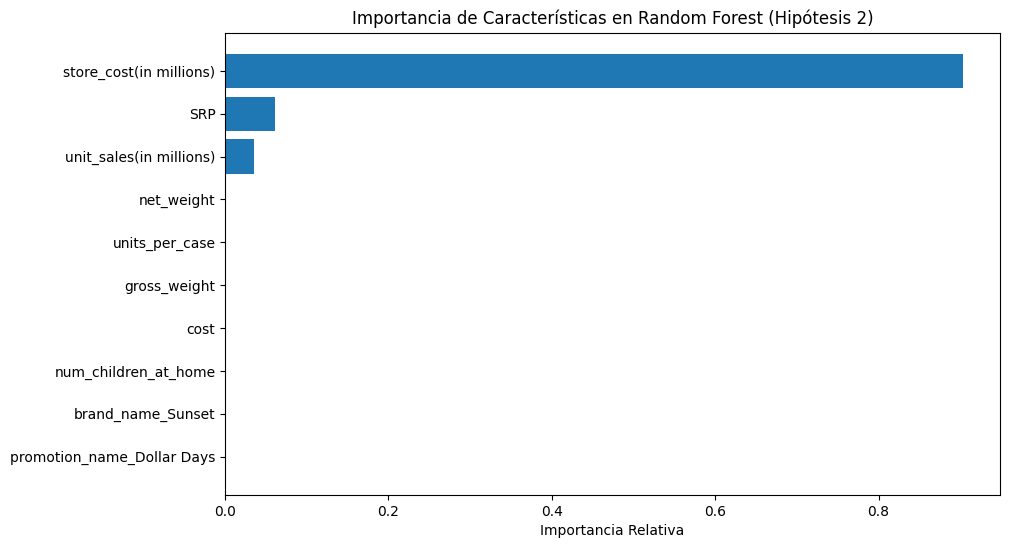

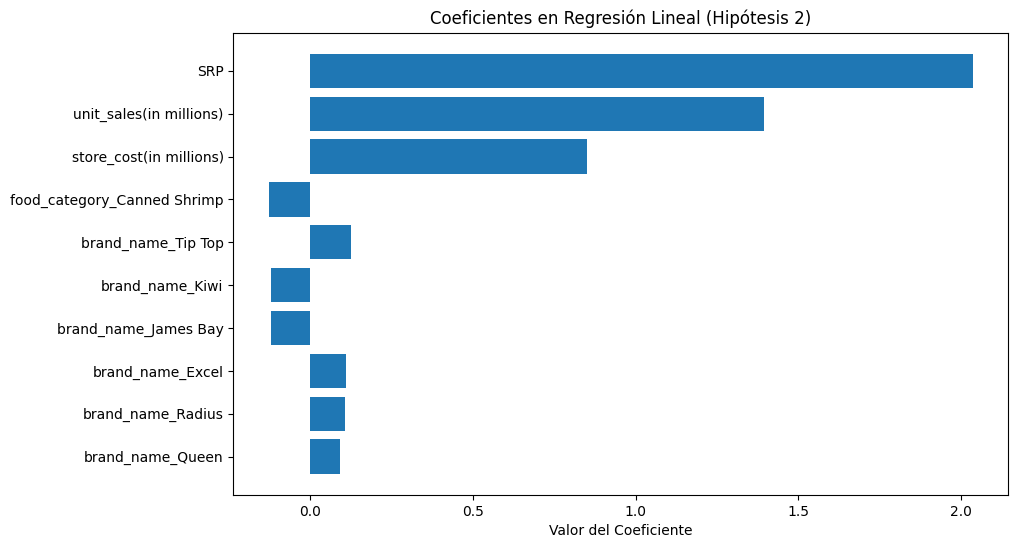

Linear Regression R^2 (Hipótesis 2): 0.9672915577375479
Random Forest Regressor R^2 (Hipótesis 2): 0.9997610452532274


In [60]:
# Hipótesis 2: El ingreso anual promedio de los clientes está correlacionado con las ventas en tienda
X2 = df_encoded_imputed.drop(['store_sales(in millions)', 'avg. yearly_income'], axis=1)
y2 = df_encoded_imputed['store_sales(in millions)']

# Dividir en conjuntos de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Entrenar modelos
lr2 = LinearRegression().fit(X2_train, y2_train)
rf2 = RandomForestRegressor().fit(X2_train, y2_train)

# Evaluación de la importancia de características en Random Forest
feature_importances2 = rf2.feature_importances_
features2 = X2.columns
indices2 = np.argsort(feature_importances2)[-10:]  # Obtener las 10 características más importantes

plt.figure(figsize=(10, 6))
plt.title('Importancia de Características en Random Forest (Hipótesis 2)')
plt.barh(range(len(indices2)), feature_importances2[indices2], align='center')
plt.yticks(range(len(indices2)), [features2[i] for i in indices2])
plt.xlabel('Importancia Relativa')
plt.show()

# Evaluación de los coeficientes en Regresión Lineal
coefficients2 = lr2.coef_
indices2 = np.argsort(np.abs(coefficients2))[-10:]  # Obtener los 10 coeficientes más importantes

plt.figure(figsize=(10, 6))
plt.title('Coeficientes en Regresión Lineal (Hipótesis 2)')
plt.barh(range(len(indices2)), coefficients2[indices2], align='center')
plt.yticks(range(len(indices2)), [features2[i] for i in indices2])
plt.xlabel('Valor del Coeficiente')
plt.show()

# Mostrar los resultados de los modelos entrenados
print(f"Linear Regression R^2 (Hipótesis 2): {lr2.score(X2_test, y2_test)}")
print(f"Random Forest Regressor R^2 (Hipótesis 2): {rf2.score(X2_test, y2_test)}")

**Hipótesis 3:** El tipo de tienda afecta el costo total de las campañas.
Columnas relevantes: store_type, cost
Evaluación: Analizar la relación entre el tipo de tienda (store_type) y el costo total de las campañas (cost).

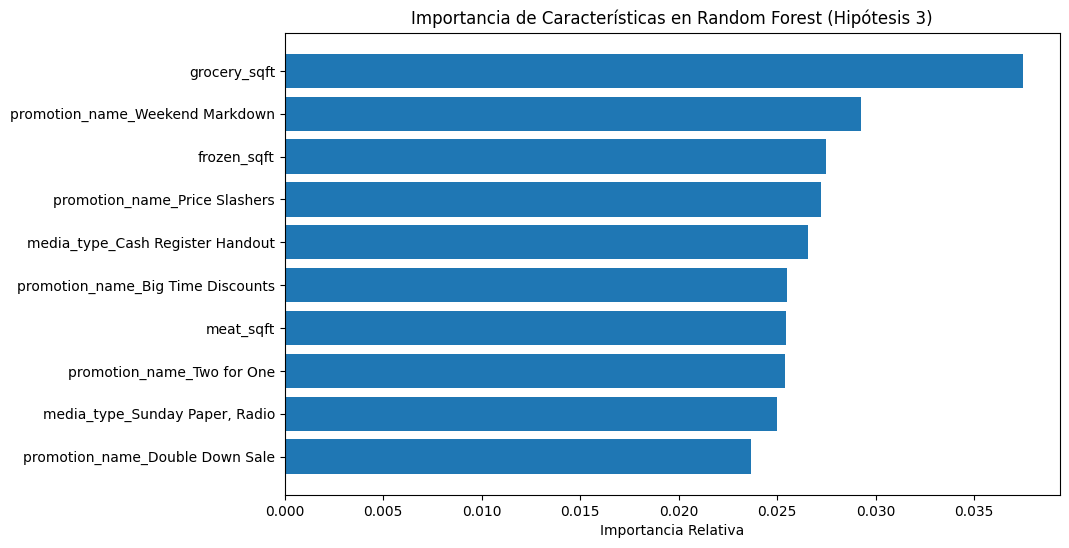

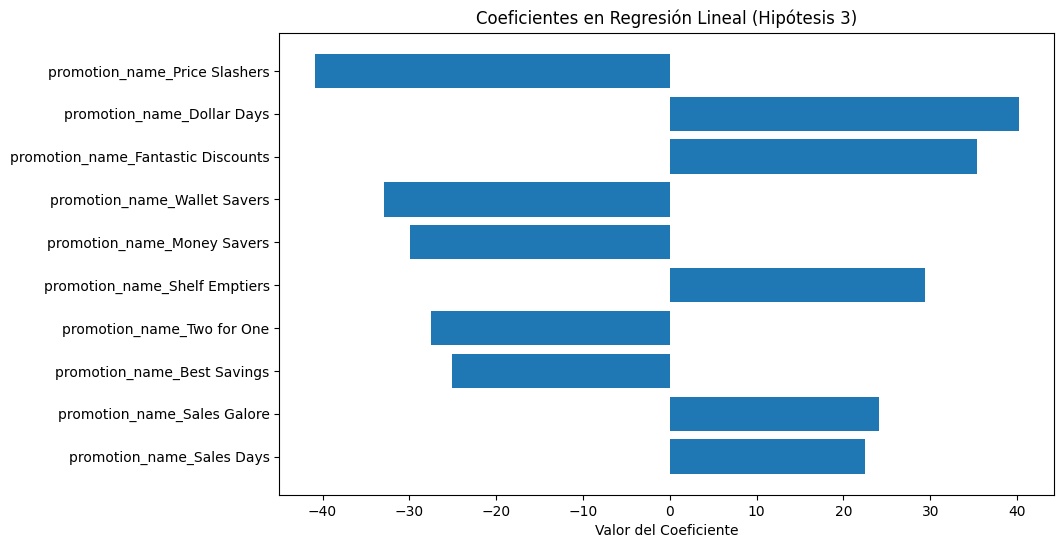

Linear Regression R^2 (Hipótesis 3): 0.3643185609538082
Random Forest Regressor R^2 (Hipótesis 3): 0.9991898143257328


In [61]:
# Hipótesis 3: El tipo de tienda afecta el costo total de las campañas
X3 = df_encoded_imputed.drop(['cost', 'avg. yearly_income'], axis=1)
y3 = df_encoded_imputed['cost']

# Dividir en conjuntos de entrenamiento y prueba
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Entrenar modelos
lr3 = LinearRegression().fit(X3_train, y3_train)
rf3 = RandomForestRegressor().fit(X3_train, y3_train)

# Evaluación de la importancia de características en Random Forest
feature_importances3 = rf3.feature_importances_
features3 = X3.columns
indices3 = np.argsort(feature_importances3)[-10:]  # Obtener las 10 características más importantes

plt.figure(figsize=(10, 6))
plt.title('Importancia de Características en Random Forest (Hipótesis 3)')
plt.barh(range(len(indices3)), feature_importances3[indices3], align='center')
plt.yticks(range(len(indices3)), [features3[i] for i in indices3])
plt.xlabel('Importancia Relativa')
plt.show()

# Evaluación de los coeficientes en Regresión Lineal
coefficients3 = lr3.coef_
indices3 = np.argsort(np.abs(coefficients3))[-10:]  # Obtener los 10 coeficientes más importantes

plt.figure(figsize=(10, 6))
plt.title('Coeficientes en Regresión Lineal (Hipótesis 3)')
plt.barh(range(len(indices3)), coefficients3[indices3], align='center')
plt.yticks(range(len(indices3)), [features3[i] for i in indices3])
plt.xlabel('Valor del Coeficiente')
plt.show()

# Mostrar los resultados de los modelos entrenados
print(f"Linear Regression R^2 (Hipótesis 3): {lr3.score(X3_test, y3_test)}")
print(f"Random Forest Regressor R^2 (Hipótesis 3): {rf3.score(X3_test, y3_test)}")

**Hipótesis 4:** La presencia de servicios adicionales en la tienda (como cafetería, bar de ensaladas, etc.) influye en las ventas en tienda.
Columnas relevantes: coffee_bar, salad_bar, store_sales(in millions)
Evaluación: Analizar la relación entre la presencia de servicios adicionales (coffee_bar, salad_bar) y las ventas en tienda (store_sales(in millions)). Puedes utilizar modelos de regresión para ver si la presencia de estos servicios tiene un impacto significativo en las ventas.

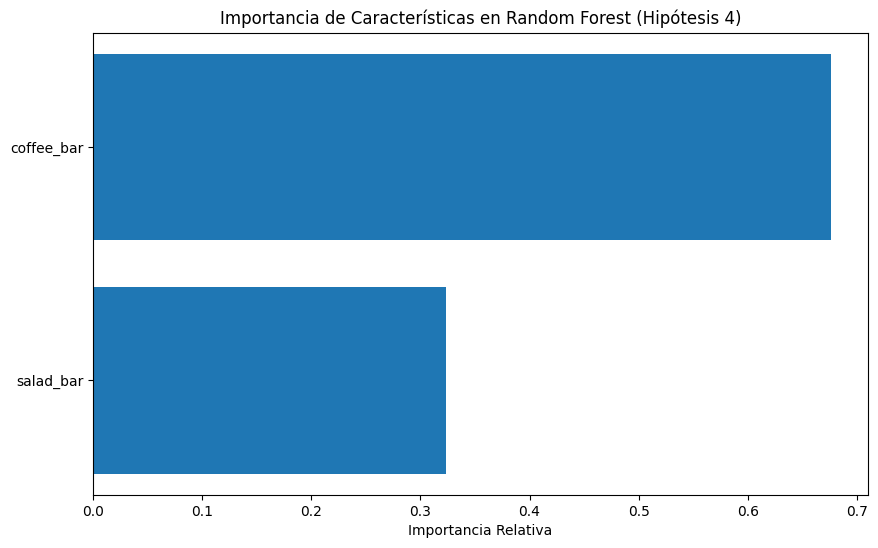

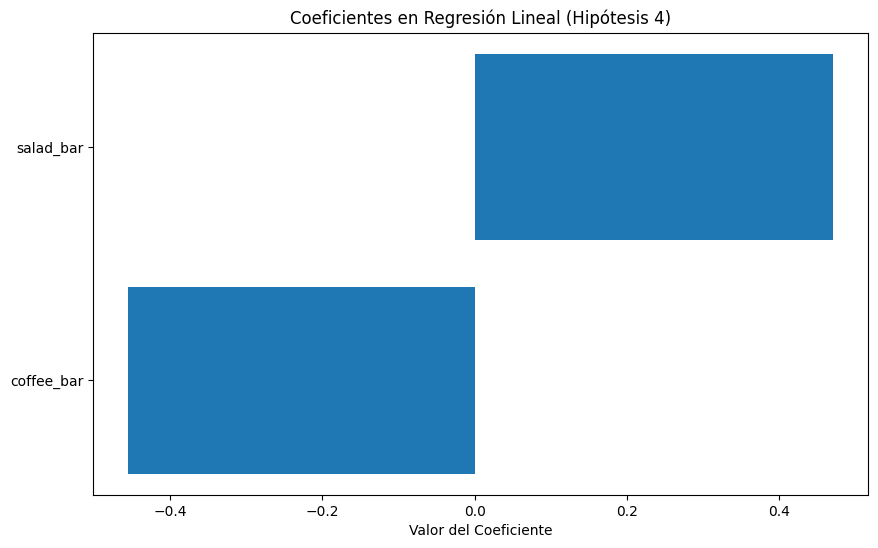

Linear Regression R^2 (Hipótesis 4): 0.0035313166745832847
Random Forest Regressor R^2 (Hipótesis 4): 0.007642189703727764


In [62]:
# Hipótesis 4: La presencia de servicios adicionales en la tienda influye en las ventas en tienda
X4 = df_encoded_imputed[['coffee_bar', 'salad_bar']]
y4 = df_encoded_imputed['store_sales(in millions)']

# Dividir en conjuntos de entrenamiento y prueba
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Entrenar modelos
lr4 = LinearRegression().fit(X4_train, y4_train)
rf4 = RandomForestRegressor().fit(X4_train, y4_train)

# Evaluación de la importancia de características en Random Forest
feature_importances4 = rf4.feature_importances_
features4 = X4.columns
indices4 = np.argsort(feature_importances4)[-10:]  # Obtener las características más importantes

plt.figure(figsize=(10, 6))
plt.title('Importancia de Características en Random Forest (Hipótesis 4)')
plt.barh(range(len(indices4)), feature_importances4[indices4], align='center')
plt.yticks(range(len(indices4)), [features4[i] for i in indices4])
plt.xlabel('Importancia Relativa')
plt.show()

# Evaluación de los coeficientes en Regresión Lineal
coefficients4 = lr4.coef_
indices4 = np.argsort(np.abs(coefficients4))[-10:]  # Obtener los coeficientes más importantes

plt.figure(figsize=(10, 6))
plt.title('Coeficientes en Regresión Lineal (Hipótesis 4)')
plt.barh(range(len(indices4)), coefficients4[indices4], align='center')
plt.yticks(range(len(indices4)), [features4[i] for i in indices4])
plt.xlabel('Valor del Coeficiente')
plt.show()

# Mostrar los resultados de los modelos entrenados
print(f"Linear Regression R^2 (Hipótesis 4): {lr4.score(X4_test, y4_test)}")
print(f"Random Forest Regressor R^2 (Hipótesis 4): {rf4.score(X4_test, y4_test)}")